In [6]:
def gaussian(s,x):
    return exp((-pi *x^2)/(s^2))

def SampleZ(s,c,loop):
    l = floor(c - s * tn) + 1
    r = floor(c + s * tn)
    #print(l,r)
    for i in range(loop):
        x = ZZ.random_element(l,r)
    #    x = floor(RR.random_element(l,r))
        u = RR.random_element(0,1)
        if (u < gaussian(s,x-c)):
            return x

In [7]:
def SampleD(B, s, c,loop):
    # B: lattice basis, c: center
    n = B[0].degree()
    samples = []
    B1, mu = B.gram_schmidt()
    w = matrix(RR,n)
    v = matrix(ZZ,n)
    w[n-1] = c
    v[n-1] = zero_vector(n)
    for j in range(loop):
        for i in range(n)[::-1]:
            li = (w[i].dot_product(B1[i])) / (B1[i].dot_product(B1[i]))
            si = s/ sqrt((B1[i]*B1[i])).n()
            zi = SampleZ(si,li,loop)
            if(zi == None):
                break
            if (i!= 0):
                w[i-1] = w[i] - zi * B[i]
                v[i-1] = v[i] + zi * B[i]
#        print(v[0])
        samples.append(v[0])
    return samples

In [16]:
n = 256
tn = log(n,2)
B = matrix(ZZ, [[ 1, 3, 4],[ 1, 4, 7],[-1, -4, -6]])
loop = 500
s = (1.98000000000*sqrt(2)+1).n()
c = zero_vector(B[0].degree())
result = SampleD(B,s,c)
show(list_plot3d(result))

Graphics3d Object

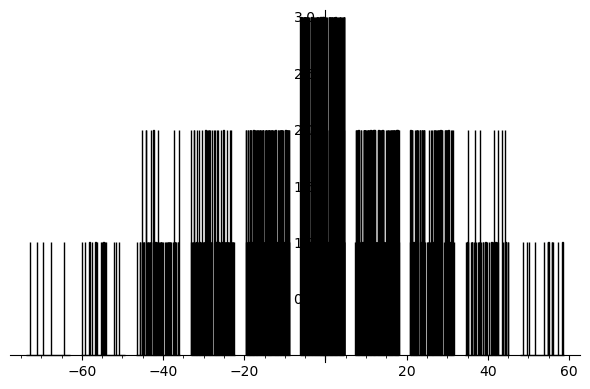

In [17]:
n = 256
tn = log(n,2)
B = matrix(ZZ, [[ 1, 3, 4],[ 1, 4, 7],[-1, -4, -6]])
loop = 500
s = (1.98000000000*sqrt(2)+1).n()
c = zero_vector(B[0].degree())
result = SampleD(B,s,c)
histogram(result)

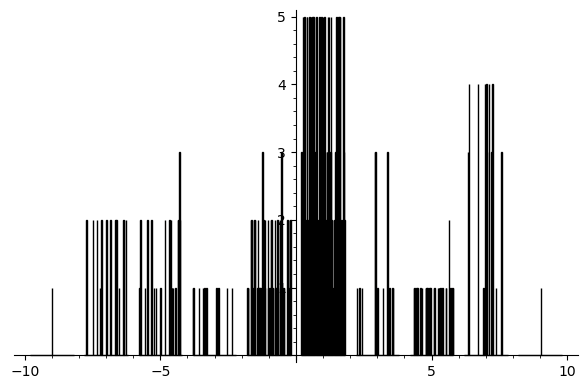

In [13]:
n = 256
tn = log(n,2)
B = matrix(ZZ, [[ 1, 3, 4, 5, 6],[ 1, 4, 7, -2, 9],[-1, -4, -6, -6, 4],[ 4, -2, -5, -8, 1],[-2, -3, -6, -2, 3]])
s = (1.98000000000*sqrt(2)+1).n()
loop = 500
c = zero_vector(5)
result = SampleD(B,s,c)
histogram(result)

In [24]:
##########  HISTOGRAM TESTING  #############
def histogram_testing(i,result,len_result):
    list_histogram_i = []
    for j in range(len_result):
        list_histogram_i.append(result[j][i])
    return list_histogram_i

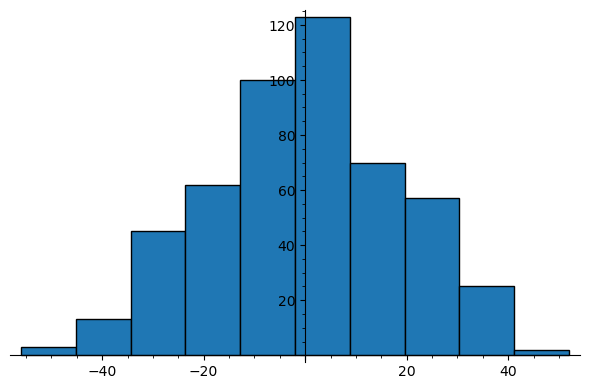

In [32]:
n = 256
tn = log(n,2)
B = matrix(ZZ, [[ 1, 3, 4],[ 1, 4, 7],[-1, -4, -6]])
dim = B[0].degree()
s = (1.98000000000*sqrt(2)+1).n()
c = zero_vector(dim)
loop = 500
result = SampleD(B,s,c,loop)
a = histogram_testing(1,result,loop) #coordinate 1 of all vectors in result sampled from Sample D.
histogram(a)

In [19]:
result[5][2]

-1